# Exp2：基于回归分析的大学综合得分预测
---

## 一、案例简介
大学排名是一个非常重要同时也极富挑战性与争议性的问题，一所大学的综合实力涉及科研、师资、学生等方方面面。目前全球有上百家评估机构会评估大学的综合得分进行排序，而这些机构的打分也往往并不一致。在这些评分机构中，世界大学排名中心（Center for World University Rankings，缩写CWUR）以评估教育质量、校友就业、研究成果和引用，而非依赖于调查和大学所提交的数据著称，是非常有影响力的一个。

本任务中我们将根据 CWUR 所提供的世界各地知名大学各方面的排名（师资、科研等），一方面通过数据可视化的方式观察不同大学的特点，另一方面希望构建机器学习模型（线性回归）预测一所大学的综合得分。

## 二、作业说明
使用来自 Kaggle 的[数据](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)，构建「线性回归」模型，根据大学各项指标的排名预测综合得分。

**基本要求：**
* 按照 8:2 随机划分训练集测试集，用 RMSE 作为评价指标，得到测试集上线性回归模型的 RMSE 值；
* 对线性回归模型的系数进行分析。

**扩展要求：**
* 对数据进行观察与可视化，展示数据特点；
* 尝试其他的回归模型，对比效果；
* 尝试将离散的地区特征融入线性回归模型，并对结果进行对比。

**注意事项：**
* 基本输入特征有 8 个：`quality_of_education`, `alumni_employment`, `quality_of_faculty`, `publications`, `influence`, `citations`, `broad_impact`, `patents`；
* 预测目标为`score`；
* 可以使用 sklearn 等第三方库，不要求自己实现线性回归；
* 需要保留所有数据集生成、模型训练测试的代码；

## 三、数据概览

假设数据文件位于当前文件夹，我们用 pandas 读入标准 csv 格式文件的函数`read_csv()`将数据转换为`DataFrame`的形式。观察前几条数据记录：

In [38]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df.head(3).T  # 观察前几列并转置方便观察

0  \
world_rank                             1   
institution           Harvard University   
region                               USA   
national_rank                          1   
quality_of_education                   7   
alumni_employment                      9   
quality_of_faculty                     1   
publications                           1   
influence                              1   
citations                              1   
broad_impact                         NaN   
patents                                5   
score                              100.0   
year                                2012   

                                                          1  \
world_rank                                                2   
institution           Massachusetts Institute of Technology   
region                                                  USA   
national_rank                                             2   
quality_of_education                                      9   
alumni_employment                                        17   
quality_of_faculty                                        3   
publications                                             12   
influence                                                 4   
citations                                                 4   
broad_impact                                            NaN   
patents                                                   1   
score                                                 91.67   
year                                                   2012   

                                        2  
world_rank                              3  
institution           Stanford University  
region                                USA  
national_rank                           3  
quality_of_education                   17  
alumni_employment                      11  
quality_of_faculty                      5  
publications                            4  
influence                               2  
citations                               2  
broad_impact                          NaN  
patents                                15  
score                                89.5  
year                                 2012

去除其中包含 NaN 的数据，保留 2000 条有效记录。

In [53]:
data_df = data_df.dropna()  # 舍去包含 NaN 的 row
len(data_df)
data_df.describe()

world_rank  national_rank  quality_of_education  alumni_employment  \
count  2000.000000    2000.000000           2000.000000        2000.000000   
mean    500.500000      42.518000            296.001500         385.263500   
std     288.747186      53.444193            106.868798         171.874782   
min       1.000000       1.000000              1.000000           1.000000   
25%     250.750000       7.000000            250.750000         250.750000   
50%     500.500000      22.000000            355.000000         478.000000   
75%     750.250000      52.000000            367.000000         500.250000   
max    1000.000000     229.000000            367.000000         567.000000   

       quality_of_faculty  publications   influence    citations  \
count         2000.000000   2000.000000  2000.00000  2000.000000   
mean           191.127500    500.415000   500.21900   449.341500   
std             52.402579    288.674823   288.30505   250.141228   
min              1.000000      1.000000     1.00000     1.000000   
25%            210.000000    250.750000   250.75000   234.000000   
50%            210.000000    500.500000   500.50000   428.000000   
75%            218.000000    750.000000   750.25000   645.000000   
max            218.000000   1000.000000   991.00000   812.000000   

       broad_impact      patents        score         year  
count   2000.000000  2000.000000  2000.000000  2000.000000  
mean     496.699500   470.321000    47.067630  2014.500000  
std      286.919755   259.625408     6.590461     0.500125  
min        1.000000     1.000000    44.020000  2014.000000  
25%      250.500000   242.750000    44.440000  2014.000000  
50%      496.000000   481.000000    44.960000  2014.500000  
75%      741.000000   737.000000    46.812500  2015.000000  
max     1000.000000   871.000000   100.000000  2015.000000

取出对应自变量以及因变量的列，之后就可以基于此切分训练集和测试集，并进行模型构建与分析。

In [40]:
feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols]
Y = data_df['score']
print(type(X))
X


<class 'pandas.core.frame.DataFrame'>


quality_of_faculty  publications  citations  alumni_employment  \
200                    1             1          1                  1   
201                    4             5          3                  2   
202                    2            15          2                 11   
203                    5            10         12                 10   
204                   10            11         11                 12   
...                  ...           ...        ...                ...   
2195                 218           926        812                567   
2196                 218           997        645                566   
2197                 218           830        812                549   
2198                 218           886        812                567   
2199                 218           861        812                567   

      influence  quality_of_education  broad_impact  patents  
200           1                     1           1.0        2  
201           3                    11           4.0        6  
202           2                     3           2.0        1  
203           9                     2          13.0       48  
204          12                     7          12.0       16  
...         ...                   ...           ...      ...  
2195        845                   367         969.0      816  
2196        908                   236         981.0      871  
2197        823                   367         975.0      824  
2198        974                   367         975.0      651  
2199        991                   367         981.0      547  

[2000 rows x 8 columns]

## 四、模型构建

（待完成）

将模型按8：2划分数据集和训练集

In [50]:
from sklearn.model_selection import train_test_split
all_y = Y.values
all_x = X.values
#print(type(all_y))

x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, test_size = 0.2, random_state = 0)

all_y.shape, all_x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape,type(y_train)

((2000,), (2000, 8), (1600, 8), (400, 8), (1600,), (400,), numpy.ndarray)

### 使用最小二乘法求解

使用pytorch将数据转换成tensor

In [51]:
import torch
x_tensor = torch.tensor(x_train,dtype=torch.float)
y_tensor = torch.tensor(y_train, dtype = torch.float)

e_tensor = torch.ones([x_tensor.shape[0],1]) # 生成[1600,1]的标准矩阵
x_tensor, y_tensor, e_tensor

(tensor([[210., 514., 800.,  ..., 355., 488., 552.],
         [ 47., 137., 187.,  ..., 186., 196., 426.],
         [218., 783., 812.,  ..., 367., 770., 628.],
         ...,
         [218., 513., 812.,  ..., 224., 590., 774.],
         [210., 523., 609.,  ..., 355., 800., 170.],
         [210., 619., 800.,  ..., 355., 749., 259.]]),
 tensor([44.8500, 48.9600, 44.2000,  ..., 44.4200, 44.9300, 44.6700]),
 tensor([[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]))

In [43]:
feature = torch.cat((x_tensor,e_tensor), 1) #链接偏移量与x（特征）矩阵
feature

tensor([[210., 514., 800.,  ..., 488., 552.,   1.],
        [ 47., 137., 187.,  ..., 196., 426.,   1.],
        [218., 783., 812.,  ..., 770., 628.,   1.],
        ...,
        [218., 513., 812.,  ..., 590., 774.,   1.],
        [210., 523., 609.,  ..., 800., 170.,   1.],
        [210., 619., 800.,  ..., 749., 259.,   1.]])

根据公式求出权重

In [44]:
b_pre = torch.mm(torch.mm(torch.inverse(torch.mm(torch.t(feature),feature)),torch.t(feature)),y_tensor.view(1600,1))
print(list(b_pre))

[tensor([-0.0610]), tensor([0.0004]), tensor([-0.0001]), tensor([-0.0068]), tensor([0.0002]), tensor([-0.0058]), tensor([-0.0023]), tensor([-0.0025]), tensor([65.0603])]


将测试数据转换为矩阵

In [45]:
test_x_tensor = torch.tensor(x_test, dtype=torch.float)
test_e_tensor = torch.ones(test_x_tensor.shape[0]).view([len(test_x_tensor),1])
test_feature = torch.cat((test_x_tensor,test_e_tensor),1)
test_feature 

tensor([[210., 512., 800.,  ..., 618.,  78.,   1.],
        [218.,  71., 368.,  ..., 265., 106.,   1.],
        [218., 149., 234.,  ..., 190., 261.,   1.],
        ...,
        [218., 938., 511.,  ..., 932., 797.,   1.],
        [218., 546., 511.,  ..., 686., 871.,   1.],
        [210., 572., 406.,  ..., 460., 426.,   1.]])

计算loss

In [46]:
loss = torch.tensor(y_test).view([400,1]) - torch.mm(test_feature,b_pre)
loss = torch.mm(torch.t(loss),loss)
loss

tensor([[8983.6113]], dtype=torch.float64)

计算RMSE（均方根误差）

In [47]:
RMSE = (loss.item()/len(y_tensor))**0.5
RMSE

2.369547865968866

计算 $R^2$

In [48]:
var = (torch.tensor(y_test)- torch.mean(torch.tensor(y_test))).view([-1,1])
var = torch.mm(torch.t(var),var)
R = 1-loss.item()/var.item()
R

0.595164123972914

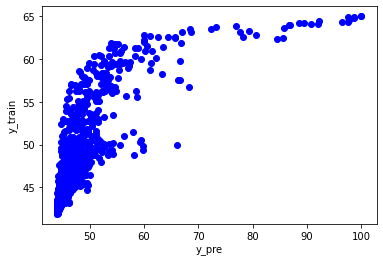

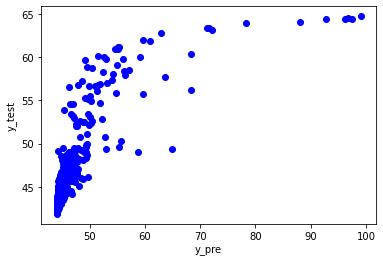

In [49]:
from matplotlib import pyplot as plt
from scipy.linalg import expm,logm


x= y_tensor
y= torch.mm(feature,b_pre)
plt.xlabel("y_pre")
plt.ylabel("y_train")
plt.plot(x,y,"ob")
plt.show()

x = y_test 
y = torch.mm(test_feature,b_pre)
plt.xlabel("y_pre")
plt.ylabel("y_test")
plt.plot(x,y,"ob")
plt.show()